In [122]:
import pandas as pd
import numpy as np
housing = pd.read_csv("./housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [123]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [124]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


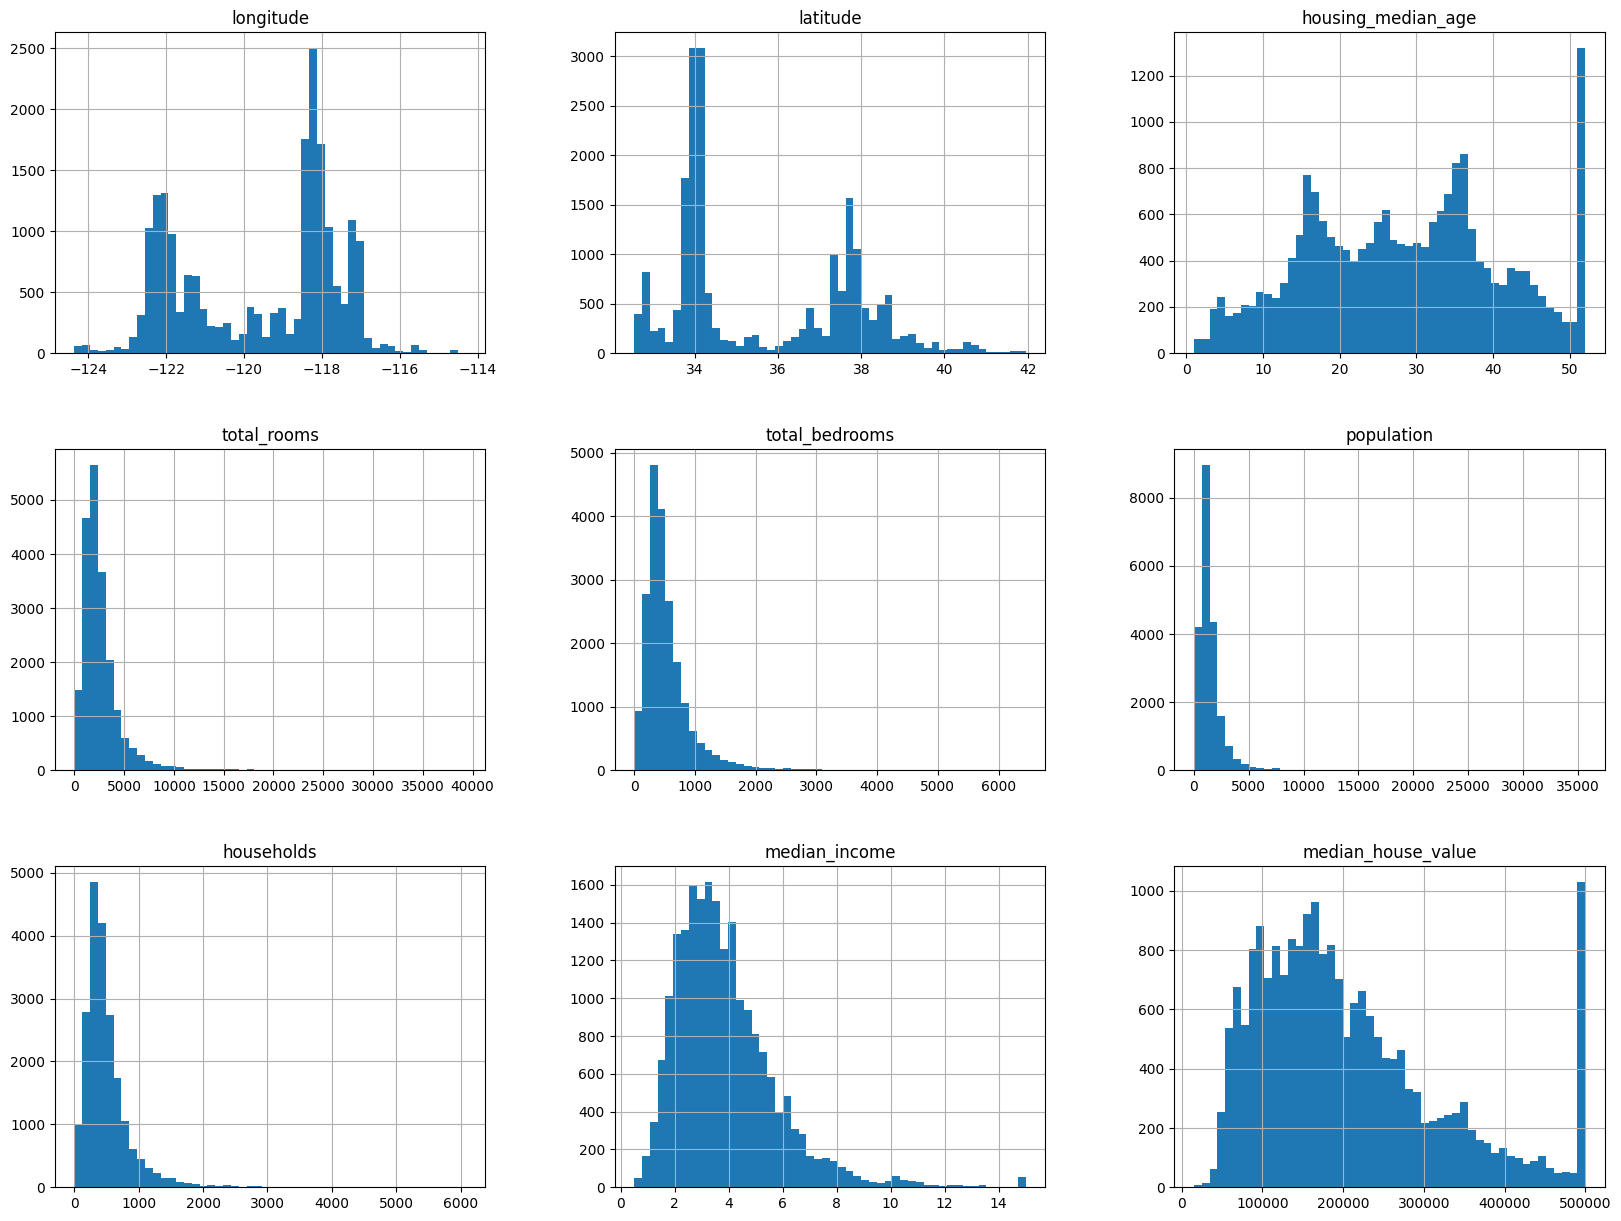

In [125]:
%matplotlib inline
import matplotlib.pyplot as pl
# A plot of all the numerical attributes in the dataset, displaying the count of values for some range
housing.hist(bins=50 , figsize=(20,15))
pl.show()

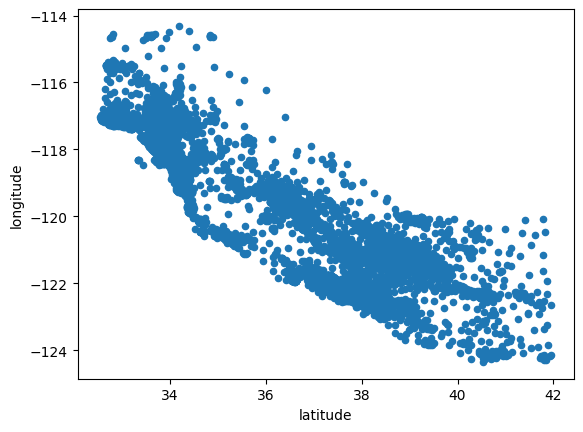

In [126]:
# A scatter plot of all the houses with latitude and longitude
housing.plot(kind="scatter" , x="latitude" , y="longitude")
pl.show()

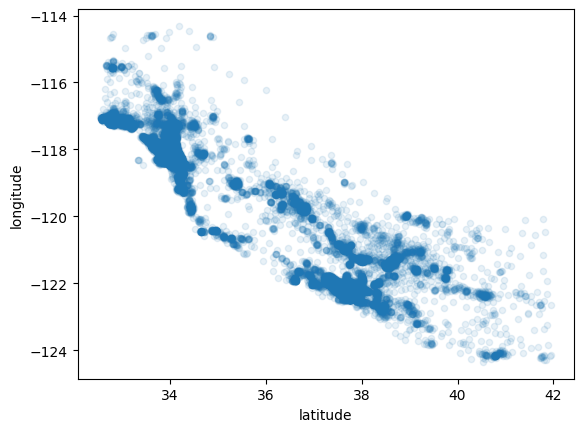

In [127]:
# A similar scatter plot but with some reduced opacity for the points 
# Helps to visualize the density of houses, where they are more cocentrated
housing.plot(kind="scatter" , x="latitude" , y="longitude" , alpha=0.1)
pl.show()

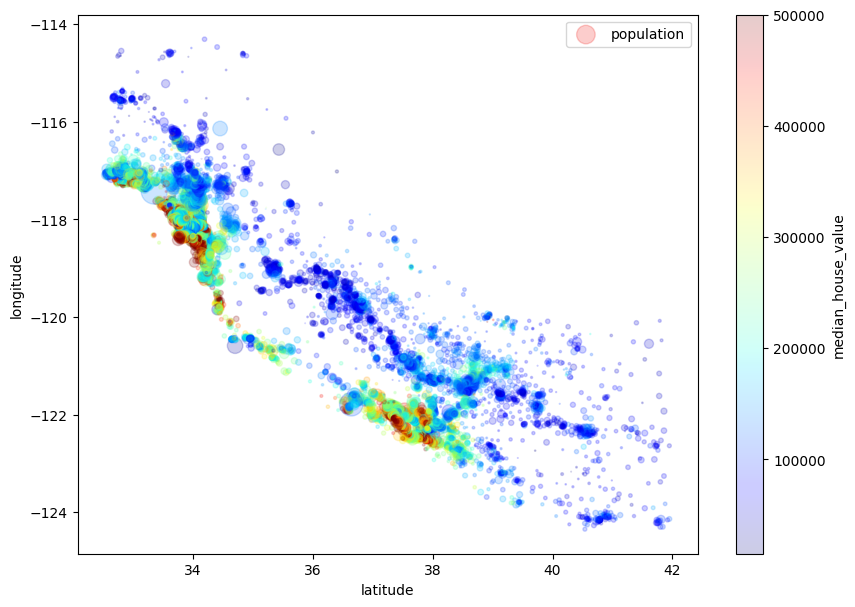

In [128]:
# Another scatter plot but with additional parameters
housing.plot(kind="scatter", x="latitude", y="longitude", 
alpha=0.2,#Reduced Opacity(alpha) has been given to all the points to get the idea of density
s=housing["population"]/100, label="population", figsize=(10,7),#The parameter 's' controls the size of the points,here based on district population  
c="median_house_value", cmap=pl.get_cmap("jet"), colorbar=True,#The parameter 'c' assigns a color scale to the points from blue to red
)
pl.legend()
pl.show()

array([[<Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='median_house_value', ylabel='median_income'>],
       [<Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housing_median_age'>,
        <Axes: xlabel='median_house_value', ylabel='housing_median_age'>],
       [<Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='median_house_value', ylabel='total_rooms'>],
       [<Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='media

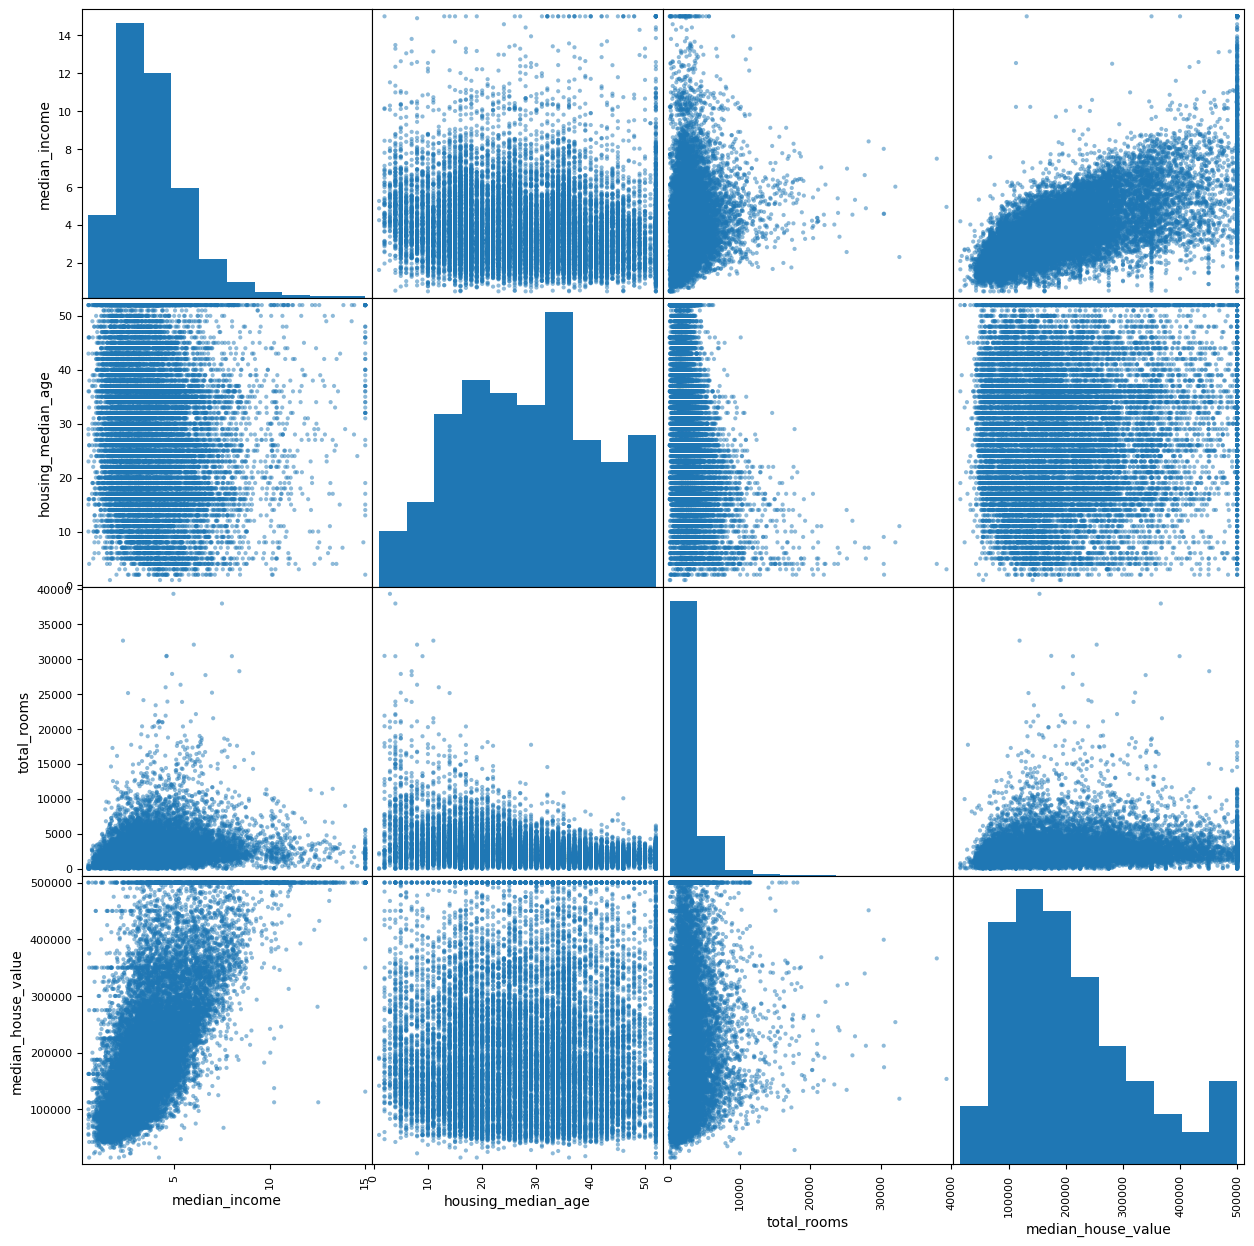

In [129]:
from pandas.plotting import scatter_matrix
# A plot of every numerical attribute with every other numerical attribute to look for correlation visually
attributes=["median_income","housing_median_age","total_rooms","median_house_value"]
scatter_matrix(housing[attributes],figsize=(15,15))

In [130]:
# Values of correlation value of all the numerical attributes with the "median_house value"
corr_matrix=housing.corr(method="pearson",numeric_only="True")
corr_matrix["median_house_value"].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [131]:
housing.info()
# Our dataset contains some null values in the total_bedrooms column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [132]:
from sklearn.impute import SimpleImputer
housing_num=housing.drop("ocean_proximity",axis=1)
housing_cat=housing[["ocean_proximity"]]

num_attr=housing_num.columns.to_list()

# calculating the median of the numerical attributes
imputer=SimpleImputer(strategy="mean")
imputer.fit(housing_num)
mean_vals=imputer.statistics_.tolist()
mean_vals=[round(num,2) for num in mean_vals]

# calculating the mean of the numerical attributes
imputer=SimpleImputer(strategy="median")
imputer.fit(housing_num)
median_vals=imputer.statistics_.tolist()

for i in range(len(num_attr)):
    print(num_attr[i],"   Mean:",mean_vals[i],"   Median:",median_vals[i])

longitude    Mean: -119.57    Median: -118.49
latitude    Mean: 35.63    Median: 34.26
housing_median_age    Mean: 28.64    Median: 29.0
total_rooms    Mean: 2635.76    Median: 2127.0
total_bedrooms    Mean: 537.87    Median: 435.0
population    Mean: 1425.48    Median: 1166.0
households    Mean: 499.54    Median: 409.0
median_income    Mean: 3.87    Median: 3.5347999999999997
median_house_value    Mean: 206855.82    Median: 179700.0


In [133]:
# Filling the null values with the Median value of the column
X=imputer.transform(housing_num)
housing_tr=pd.DataFrame(X,columns=housing_num.columns)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [134]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
# Converting Categorical data to numerical via Ordainal and One Hot Encoding techniques
ord_enc=OrdinalEncoder()
one_h_enc=OneHotEncoder()

In [135]:
# Ordinal encoding assigns a numerical value to each type of category
housing_cat_enc=ord_enc.fit_transform(housing_cat)
# Assigns these categories integer values starting from 0
print(ord_enc.categories_)
print(housing_cat_enc)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
[[3.]
 [3.]
 [3.]
 ...
 [1.]
 [1.]
 [1.]]


In [136]:
# One hot encoding instead seperates the column into no. of categories and assigns 1 to the corresponding integer column for the category,rest zero  
housing_cat_1hot=one_h_enc.fit_transform(housing_cat)
housing_cat_1hot_=housing_cat_1hot.toarray()
housing_cat_1hot_p=pd.DataFrame(housing_cat_1hot_)
print(housing_cat_1hot_p)

         0    1    2    3    4
0      0.0  0.0  0.0  1.0  0.0
1      0.0  0.0  0.0  1.0  0.0
2      0.0  0.0  0.0  1.0  0.0
3      0.0  0.0  0.0  1.0  0.0
4      0.0  0.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...
20635  0.0  1.0  0.0  0.0  0.0
20636  0.0  1.0  0.0  0.0  0.0
20637  0.0  1.0  0.0  0.0  0.0
20638  0.0  1.0  0.0  0.0  0.0
20639  0.0  1.0  0.0  0.0  0.0

[20640 rows x 5 columns]


In [137]:
housing_prepared=pd.merge(housing_tr,housing_cat_1hot_p,left_index=True,right_index=True)
housing_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,0,1,2,3,4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


In [138]:
housing_prepared.to_csv('housing_prepared.csv',index=False)
